---
# Lead Dell Fortaleza - Curso de Machine Learning 🤖️
### Oficina 3 - Redes Neurais Artificiais com Tensorflow e Keras

Neste notebook iremos realizar a análise do conjunto de dados "Mnist". Será implementado um modelo de rede neural artificial contendo uma camada intermediária com 50 neurônios.


Por: Pedro Florencio de Almeida Neto

---

<b>Importando as bibliotecas necessárias</b>

In [63]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

<b>Importando o conjunto de dados Mnist</b>

In [64]:
fashion_mnist = keras.datasets.fashion_mnist

<b>Definindo as imagens de treino e teste, além das suas respectivas labels</b>

In [65]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

<b> Identificando o tamanho das imagens de treinamento </b>

In [66]:
train_images.shape

(60000, 28, 28)

In [67]:
len(train_labels)

60000

<b> Labels do conjunto de treinamento: números de 0 a 9 </b>

In [68]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

<b> Identificando o tamanho das imagens de teste </b>

In [69]:
test_images.shape

(10000, 28, 28)

In [70]:
len(test_labels)

10000

---
<b> Modificando a escala de cada pixel das imagens </b>

In [71]:
# Escala entre 0 e 1
train_images = train_images/255
test_images = test_images/255

<b>Construindo o modelo de redes neurais</b>

In [72]:
# Modelo sequencial com uma layer de flatten (Transforma a entrada em um vetor unidimensional)
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(50,activation=tf.nn.relu),keras.layers.Dense(10,activation=tf.nn.softmax)])

# Resumo do modelo criado
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


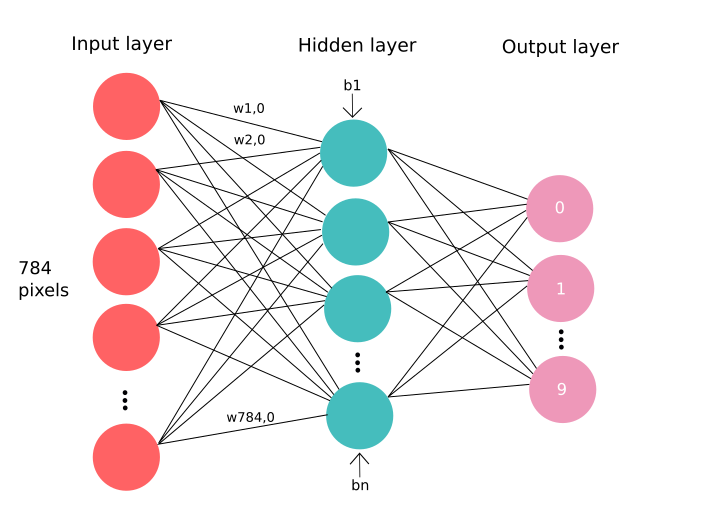

Nossa rede neural contém 3 camadas: camada de entrada com 784 neurônios, uma camada intermediária com 50 neurônios e uma camada de saída com 10 neurônios que, através da softmax, retorna as probabilidades da imagem ser cada um dos 10 números. Para cada neurônio da camada de entrada há um peso diferente, logo 784*50 pesos + 1 bias para cada neurônio da camada intermediária (50 bias). Logo temos 39250 variáveis. Na última camada há 510 variáveis.

In [73]:
# otimizador -> Faz a regulação dos pesos, 
# loss -> Referente aos erros
# metric -> Porcentagem de elementos classificados corretamente sobre o total
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [74]:
# Treinamento com 10 épocas
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6736 - accuracy: 0.7684
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4019 - accuracy: 0.8550
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3612 - accuracy: 0.8707
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3353 - accuracy: 0.8783
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3171 - accuracy: 0.8828
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3051 - accuracy: 0.8902
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2988 - accuracy: 0.8918
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2780 - accuracy: 0.8968
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2722 - accuracy: 0.9004
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.265

---
<b>Acurácia do modelo: </b>

In [75]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print('Teste accuracy: ',test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8773
Teste accuracy:  0.8773000240325928


87,73% de acurácia sobre o conjunto de teste, utilizando 10 épocas

---
<b>Predição para a primeira imagem de teste</b>

In [76]:
predictions = model.predict(test_images)
predictions

array([[1.4004379e-06, 9.3017247e-11, 6.2145062e-07, ..., 2.7550349e-02,
        2.7031721e-05, 9.6785498e-01],
       [1.4246058e-05, 4.1013633e-11, 9.6458912e-01, ..., 5.2819284e-22,
        1.1729405e-10, 4.9778107e-14],
       [1.1532449e-06, 9.9999881e-01, 5.0260458e-09, ..., 1.0024259e-19,
        2.8140331e-12, 9.3737106e-17],
       ...,
       [3.3987549e-04, 8.5797791e-10, 2.0109025e-04, ..., 1.5530211e-11,
        9.9927086e-01, 4.5322268e-17],
       [3.4014818e-07, 9.9989045e-01, 9.7839887e-08, ..., 5.1314713e-11,
        3.1041733e-10, 7.8379320e-10],
       [1.1752447e-05, 3.0280671e-09, 7.7574177e-06, ..., 3.9679435e-04,
        8.4475869e-05, 1.8043349e-05]], dtype=float32)

In [77]:
predictions[0]

array([1.4004379e-06, 9.3017247e-11, 6.2145062e-07, 2.9188130e-10,
       1.9071955e-07, 4.5650527e-03, 3.8913055e-07, 2.7550349e-02,
       2.7031721e-05, 9.6785498e-01], dtype=float32)

In [78]:
np.argmax(predictions[0])

9

A primeira imagem do conjunto de testes tem 96,78% de ser o número 9

<b>Obrigado!</b>

---